In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import theano

import csv
import scipy.misc
import scipy
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
print("Importing the file")

df = pd.read_csv('fer2013.csv')

df.head()

Importing the file


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [5]:
training, val, test = np.split(df, [int(.8*len(df)), int(.9*len(df))])

print('Training: ', len(training))
print('PublicTest: ', len(val))
print('PrivateTest: ', len(test))

Training:  28709
PublicTest:  3589
PrivateTest:  3589


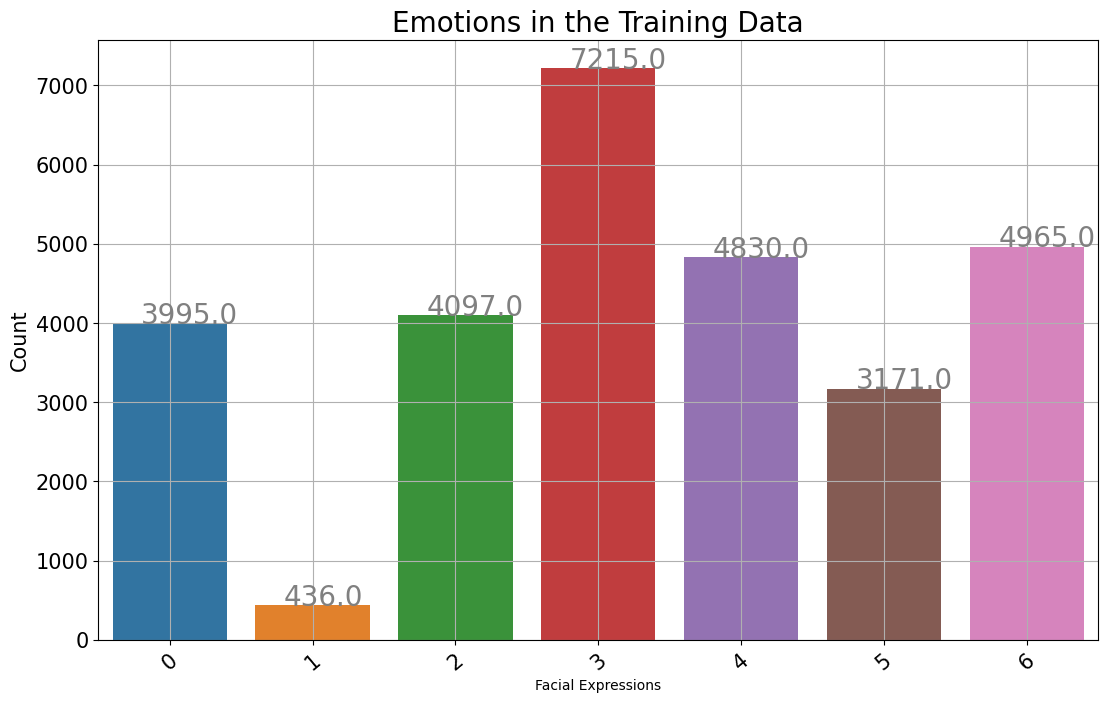

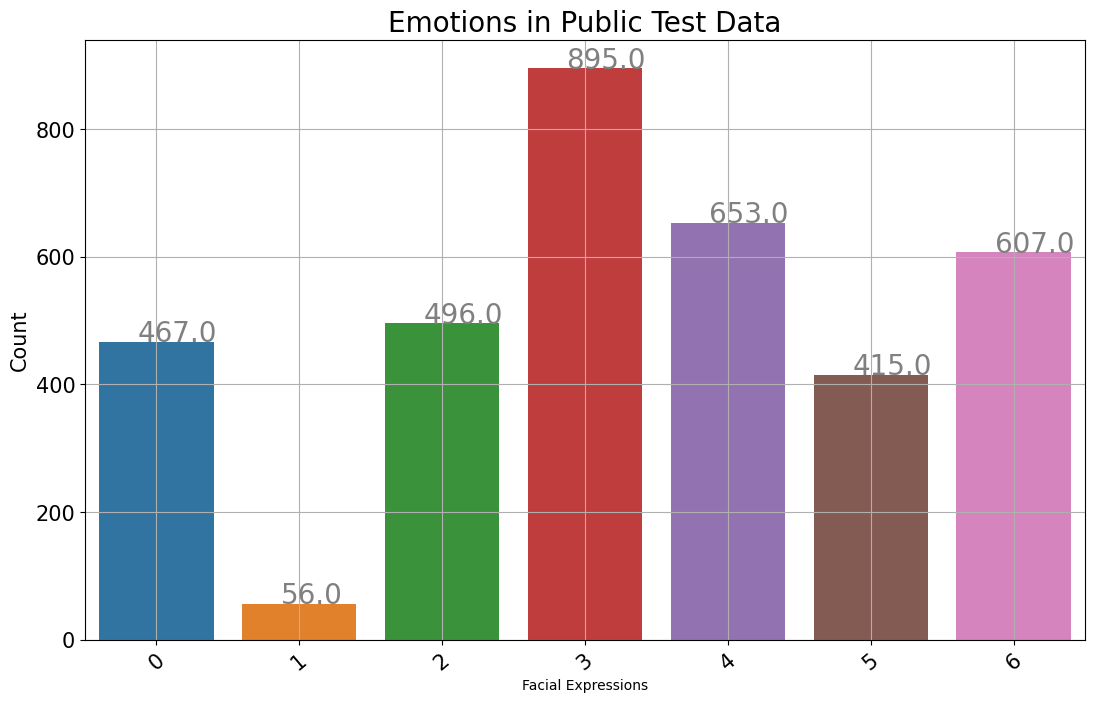

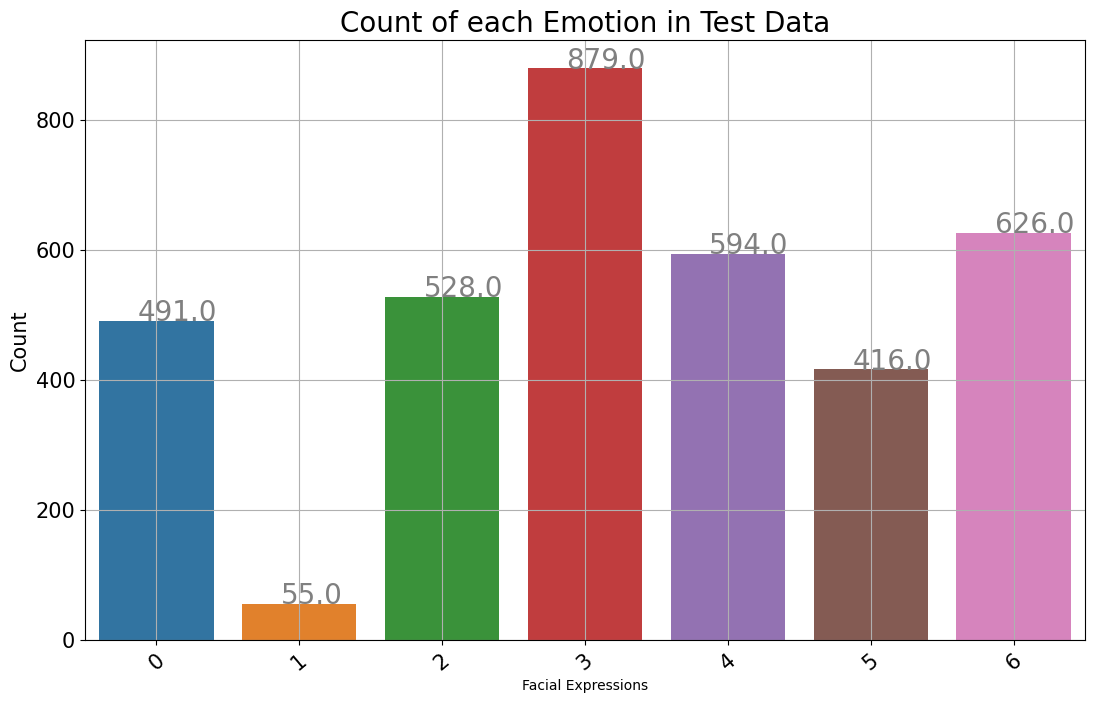

In [6]:
#labels = ['Angry', 'Digust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Emotions in the Training Data", fontsize = 20)
sns.countplot(x = "emotion", data = training)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Facial Expressions")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()


fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Emotions in Public Test Data", fontsize = 20)
sns.countplot(x = "emotion", data = val)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Facial Expressions")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()


fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "emotion", data = test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Facial Expressions")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()


In [24]:
data = df.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


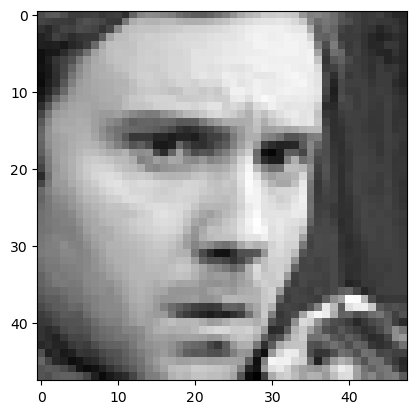

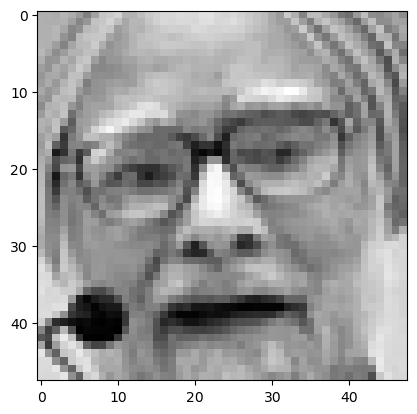

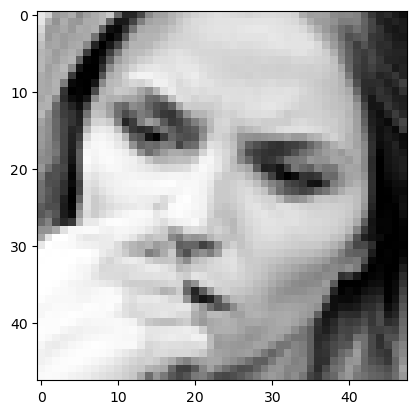

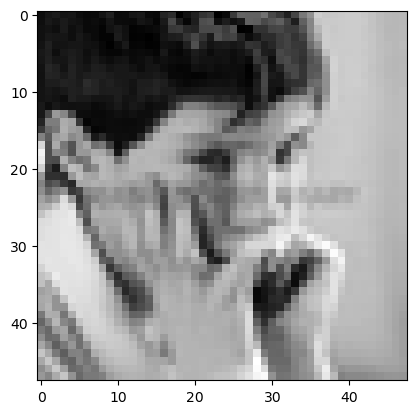

In [26]:
for ix in range(4):
    plt.figure(ix)
    img_array = np.array(df.iloc[ix, 1].split(' '), dtype=float).reshape((48, 48))
    plt.imshow(img_array, interpolation='none', cmap='gray')
plt.show()


In [44]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [45]:
data_labels = {0:'Angry',1:'Disgust',2:'Afraid',3:'Ecstatic',4:'NO REACTION!',5:'Unhappy',6:'Surprised'}

In [47]:
new_data = df.copy()

In [10]:
import math
import numpy as np
import pandas as pd

import cv2
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,MaxPooling1D
from keras.layers import Activation,Dropout,Flatten,BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
import tensorflow as tf
import keras
from keras import backend as K
K.image_data_format()
from keras import applications
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.regularizers import l2
import csv
import scipy.misc
import scipy
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator

In [11]:


print("Importing the csv file")

df = pd.read_csv('fer2013.csv')

X = df.iloc[:, 1].values
y = df.iloc[:, 0].values

img_height = 48
img_width = 48
images = np.empty((len(X), img_height, img_width, 3))
i = 0
for pixel_string in X:
    temp = [float(pixel) for pixel in pixel_string.split(' ')]
    temp = np.asarray(temp).reshape(img_height, img_width)
    temp = cv2.resize(temp, (img_height, img_width), interpolation=cv2.INTER_AREA)

    channel = np.empty((img_height, img_width, 3))
    channel[:, :, 0] = temp
    channel[:, :, 1] = temp
    channel[:, :, 2] = temp

    images[i, :, :, :] = channel
    i = i + 1

images /= 255.0
labels = keras.utils.to_categorical(y, 7)

crossvalidation_set = images[32096:, :, :, :]
images = images[0:28709, :, :, :]

cross_label = labels[32096::, :]
labels = labels[0:28709, :]

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./1)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(images)

# fits the model on batches with real-time data augmentation:
training_datagen = datagen.flow(images, labels, batch_size=32)

validation_datagen = test_datagen.flow(crossvalidation_set, cross_label, batch_size=32)

input_shape = (48, 48, 3)
batch_size = 64
epochs = 100
verbose = 1

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Dropout(0.35))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128,(3, 3),activation='relu'))

model.add(Conv2D(256,(3, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='categorical_crossentropy'
)

model.summary()

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./1)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(images)

# fits the model on batches with real-time data augmentation:
training_datagen = datagen.flow(images, labels, batch_size=32)

validation_datagen = test_datagen.flow(crossvalidation_set, cross_label, batch_size=32)

history = model.fit(
    images, labels,
    validation_data=(crossvalidation_set, cross_label),
    batch_size=batch_size,
    verbose=verbose,
    epochs=epochs
)


Importing the csv file
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 44, 44, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                 

Model Test Accuracy: accuracy: 0.9683


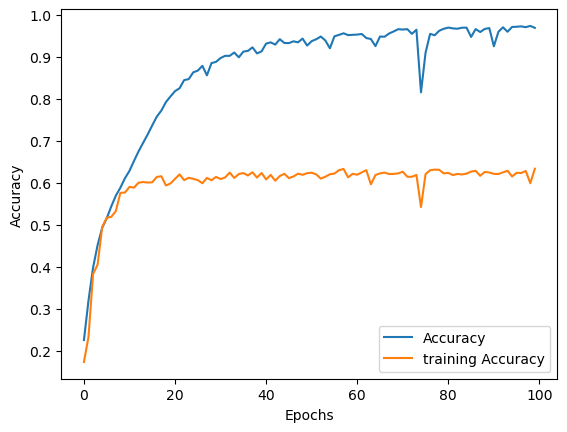

In [21]:


# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [43]:


print("Importing the csv file")

df = pd.read_csv('fer2013.csv')

X = df.iloc[:, 1].values
y = df.iloc[:, 0].values

img_height = 48
img_width = 48
images = np.empty((len(X), img_height, img_width, 3))
i = 0
for pixel_string in X:
    temp = [float(pixel) for pixel in pixel_string.split(' ')]
    temp = np.asarray(temp).reshape(img_height, img_width)
    temp = cv2.resize(temp, (img_height, img_width), interpolation=cv2.INTER_AREA)

    channel = np.empty((img_height, img_width, 3))
    channel[:, :, 0] = temp
    channel[:, :, 1] = temp
    channel[:, :, 2] = temp

    images[i, :, :, :] = channel
    i = i + 1

images /= 255.0
labels = keras.utils.to_categorical(y, 7)

crossvalidation_set = images[32096:, :, :, :]
images = images[0:28709, :, :, :]

cross_label = labels[32096::, :]
labels = labels[0:28709, :]

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./1)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(images)

# fits the model on batches with real-time data augmentation:
training_datagen = datagen.flow(images, labels, batch_size=32)

validation_datagen = test_datagen.flow(crossvalidation_set, cross_label, batch_size=32)

input_shape = (48, 48, 3)
batch_size = 128
epochs = 14
verbose = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Dropout(0.35))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128,(3, 3),activation='relu'))

model.add(Conv2D(256,(3, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='categorical_crossentropy'
)

model.summary()

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./1)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(images)

# fits the model on batches with real-time data augmentation:
training_datagen = datagen.flow(images, labels, batch_size=32)

validation_datagen = test_datagen.flow(crossvalidation_set, cross_label, batch_size=32)

history = model.fit(
    images, labels,
    validation_data=(crossvalidation_set, cross_label),
    batch_size=batch_size,
    verbose=verbose,
    epochs=epochs
)


Importing the csv file
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 dropout_7 (Dropout)         (None, 46, 46, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 44, 44, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 20, 20, 128)       73856     
                              